In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split
%matplotlib inline

In [2]:
ratings = pd.read_csv('ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [3]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [4]:
pmf_svd = SVD(biased = False)
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0149  1.0095  1.0051  1.0054  1.0127  1.0095  0.0039  
MAE (testset)     0.7856  0.7806  0.7737  0.7788  0.7822  0.7802  0.0039  
Fit time          0.36    0.36    0.37    0.36    0.36    0.36    0.00    
Test time         0.06    0.09    0.06    0.05    0.09    0.07    0.02    


<AxesSubplot:ylabel='Frequency'>

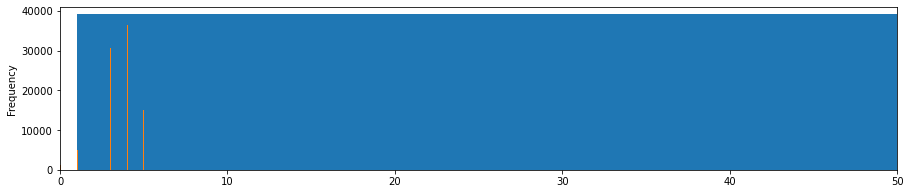

In [127]:
ratings["movieId"].fillna(ratings["movieId"].median(), inplace=True)
ratings["rating"].fillna(ratings["rating"].median(), inplace=True)
ratings['movieId'] = ratings['movieId'].astype(int)
ratings['rating'] = ratings['rating'].astype(int)
ratings['movieId'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))
ratings['rating'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

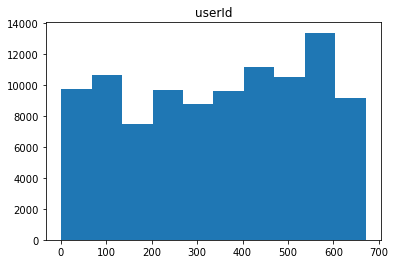

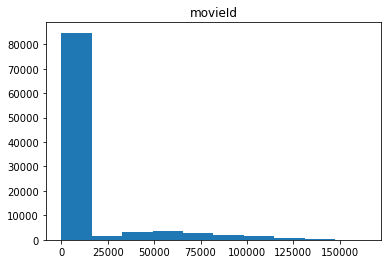

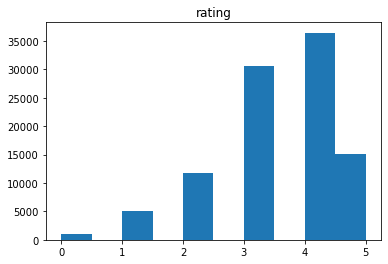

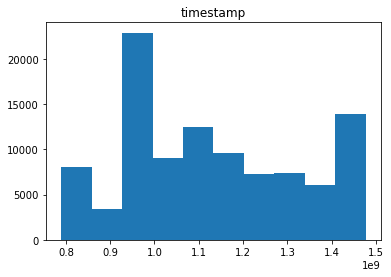

In [132]:
for i in ratings.columns:
    plt.hist(ratings[i])
    plt.title(i)
    plt.show()

In [5]:
cv_pmf

{'test_rmse': array([1.01492425, 1.00951029, 1.00506726, 1.00544326, 1.01269379]),
 'test_mae': array([0.78563667, 0.78056832, 0.7736994 , 0.7787571 , 0.78216605]),
 'fit_time': (0.36100006103515625,
  0.3602159023284912,
  0.369732141494751,
  0.3620131015777588,
  0.36469507217407227),
 'test_time': (0.05721116065979004,
  0.09023571014404297,
  0.05535578727722168,
  0.05409884452819824,
  0.08899903297424316)}

In [49]:
print('MAE on a PMF Collaborative Filtering Average: ', cv_pmf['test_mae'].mean())
print('RMSE on average for PMF Collaborative Filtering: ', cv_pmf['test_rmse'].mean())

MAE on a PMF Collaborative Filtering Average:  0.7801655101158292
RMSE on average for PMF Collaborative Filtering:  1.0095277704188903


In [7]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9727  0.9636  0.9637  0.9705  0.9747  0.9690  0.0046  
MAE (testset)     0.7498  0.7423  0.7373  0.7436  0.7517  0.7449  0.0052  
Fit time          0.04    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.74    0.75    0.76    0.71    0.75    0.74    0.02    


In [50]:
print('MAE on a user-based collaborative filtering average: ', cv_ub['test_mae'].mean())
print('RMSE on a user-based collaborative filtering average: ', cv_ub['test_rmse'].mean())

MAE on a user-based collaborative filtering average:  0.7449410366292268
RMSE on a user-based collaborative filtering average:  0.969031945250079


In [9]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9446  0.9267  0.9365  0.9352  0.9316  0.9349  0.0059  
MAE (testset)     0.7260  0.7150  0.7226  0.7213  0.7189  0.7207  0.0037  
Fit time          1.66    1.74    1.67    1.63    1.66    1.67    0.04    
Test time         3.13    3.05    3.27    3.07    3.11    3.13    0.08    


In [51]:
print('Average MAE for Collaborative Filtering Based on Items: ', cv_ib['test_mae'].mean())
print('Item-based Collaborative Filterings average RMSE: ', cv_ib['test_rmse'].mean())

Average MAE for Collaborative Filtering Based on Items:  0.7207499132064219
Item-based Collaborative Filterings average RMSE:  0.9349154682918049


In [11]:
sim_options = {'name':'cosine', 'user_based': True}
ub_cosine = KNNBasic(sim_options=sim_options);
cv_ub_cosine = cross_validate(ub_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9996  0.9971  0.9907  0.9951  0.9920  0.9949  0.0032  
MAE (testset)     0.7704  0.7708  0.7655  0.7689  0.7663  0.7684  0.0021  
Fit time          0.05    0.06    0.06    0.06    0.06    0.06    0.00    
Test time         0.76    0.80    0.72    0.80    0.73    0.76    0.04    


In [12]:
sim_options = {'name':'msd', 'user_based': True}
ub_msd = KNNBasic(sim_options=sim_options);
cv_ub_msd = cross_validate(ub_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9787  0.9576  0.9621  0.9639  0.9711  0.9667  0.0074  
MAE (testset)     0.7532  0.7346  0.7400  0.7442  0.7439  0.7432  0.0061  
Fit time          0.03    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.71    0.71    0.72    0.78    0.71    0.73    0.03    


In [13]:
sim_options = {'name':'pearson', 'user_based': True}
ub_pearson = KNNBasic(sim_options=sim_options);
cv_ub_pearson = cross_validate(ub_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9940  0.9968  1.0045  0.9909  1.0042  0.9981  0.0054  
MAE (testset)     0.7722  0.7736  0.7767  0.7672  0.7767  0.7733  0.0035  
Fit time          0.09    0.08    0.08    0.07    0.07    0.08    0.01    
Test time         0.86    0.70    0.78    0.80    0.77    0.78    0.05    


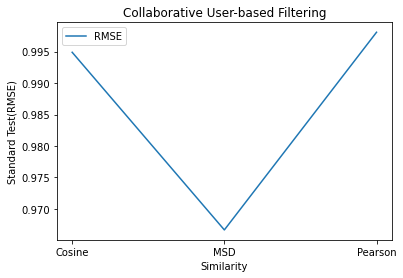

In [64]:
x = [0,1,2]
y_rmse = [cv_ub_cosine['test_rmse'].mean(),cv_ub_msd['test_rmse'].mean(),cv_ub_pearson['test_rmse'].mean()]
plt.plot(x, y_rmse)
plt.title('Collaborative User-based Filtering')
plt.legend(['RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Standard Test(RMSE)')
plt.show()

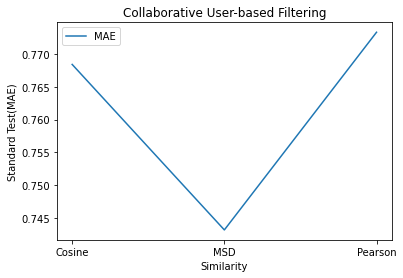

In [66]:
x = [0,1,2]
y_mae = [cv_ub_cosine['test_mae'].mean(),cv_ub_msd['test_mae'].mean(),cv_ub_pearson['test_mae'].mean()]
plt.plot(x, y_mae)
plt.title('Collaborative User-based Filtering')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Standard Test(MAE)')
plt.show()

In [15]:
sim_options = {'name':'cosine', 'user_based': False}
ib_cosine = KNNBasic(sim_options=sim_options);
cv_ib_cosine = cross_validate(ib_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9923  1.0001  1.0027  0.9820  0.9935  0.9941  0.0072  
MAE (testset)     0.7749  0.7764  0.7791  0.7636  0.7759  0.7740  0.0054  
Fit time          3.45    3.63    3.37    3.30    3.73    3.50    0.16    
Test time         3.05    3.12    3.02    3.02    3.22    3.09    0.07    


In [16]:
sim_options = {'name':'msd', 'user_based': False}
ib_msd = KNNBasic(sim_options=sim_options);
cv_ib_msd = cross_validate(ib_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9348  0.9315  0.9241  0.9438  0.9414  0.9351  0.0071  
MAE (testset)     0.7215  0.7174  0.7155  0.7260  0.7261  0.7213  0.0043  
Fit time          1.50    1.50    1.50    1.69    1.58    1.55    0.08    
Test time         3.02    3.22    3.11    3.07    3.15    3.11    0.07    


In [17]:
sim_options = {'name':'pearson', 'user_based': False}
ib_pearson = KNNBasic(sim_options=sim_options);
cv_ib_pearson = cross_validate(ib_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9995  0.9993  0.9776  0.9941  0.9779  0.9897  0.0099  
MAE (testset)     0.7725  0.7767  0.7601  0.7754  0.7571  0.7684  0.0081  
Fit time          6.13    5.54    5.48    5.30    5.61    5.61    0.28    
Test time         3.05    3.54    3.08    4.10    3.22    3.40    0.39    


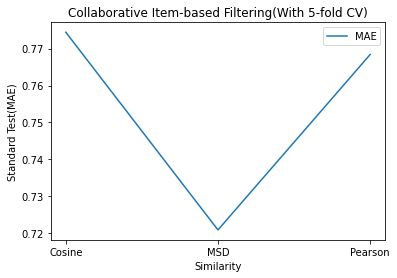

In [67]:
x = [0,1,2]
y_mae = [cv_ib_cosine['test_mae'].mean(),cv_ib_msd['test_mae'].mean(),cv_ib_pearson['test_mae'].mean()]
plt.plot(x, y_mae)
plt.title('Collaborative Item-based Filtering(With 5-fold CV)')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Standard Test(MAE)')
plt.show()

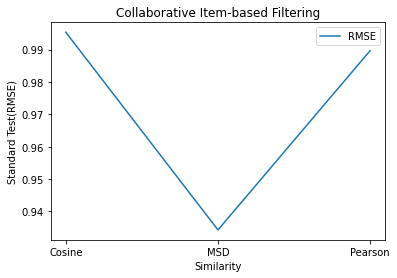

In [70]:
x = [0,1,2]
y_rmse = [cv_ib_cosine['test_rmse'].mean(),cv_ib_msd['test_rmse'].mean(),cv_ib_pearson['test_rmse'].mean()]
plt.plot(x, y_rmse)
plt.title('Collaborative Item-based Filtering')
plt.legend(['RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Standard Test(RMSE)')
plt.show()

In [38]:
sim_options = {'name':'cosine', 'user_based': False}
ib_cosine = KNNBasic(sim_options=sim_options);
cv_ib_cosine = cross_validate(ib_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9976  0.9950  0.9894  1.0056  0.9892  0.9954  0.0061  
MAE (testset)     0.7768  0.7740  0.7696  0.7819  0.7699  0.7744  0.0046  
Fit time          3.35    3.79    3.39    3.02    3.06    3.32    0.28    
Test time         3.18    3.20    3.12    3.22    3.09    3.16    0.05    


In [39]:
sim_options = {'name':'msd', 'user_based': False}
ib_msd = KNNBasic(sim_options=sim_options);
cv_ib_msd = cross_validate(ib_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9397  0.9371  0.9275  0.9342  0.9330  0.9343  0.0041  
MAE (testset)     0.7247  0.7255  0.7147  0.7194  0.7204  0.7209  0.0039  
Fit time          1.69    1.70    1.60    1.62    1.54    1.63    0.06    
Test time         3.23    3.28    3.51    3.21    3.39    3.32    0.11    


In [40]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 42)


In [42]:
ubc_nn_mae = []
ubc_nn_rmse = []
k1 = list(np.arange(1,60,1))
for i in k1:
  ubc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  ubc_nn.fit(trainset)
  predictions = ubc_nn.test(testset)
  ubc_nn_mae.append(accuracy.mae(predictions))
  ubc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9063
RMSE: 1.2110
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8196
RMSE: 1.0739
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7878
RMSE: 1.0270
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 1.0039
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7612
RMSE: 0.9913
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7537
RMSE: 0.9822
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7494
RMSE: 0.9772
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7467
RMSE: 0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7451
RMSE: 0.9721
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7435
RMSE: 0.9698
Computing 

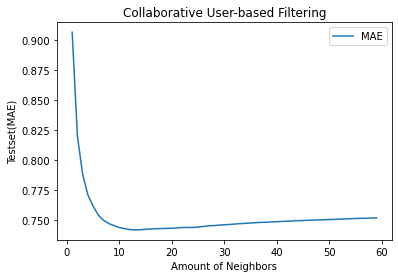

In [72]:
plt.plot(k1,ubc_nn_mae)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Testset(MAE)')
plt.legend(['MAE'])
plt.title('Collaborative User-based Filtering')
plt.show()

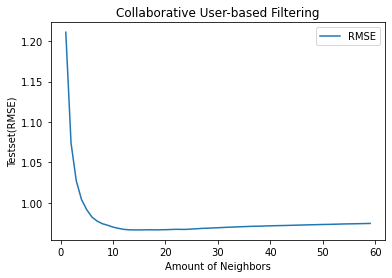

In [71]:
plt.plot(k1,ubc_nn_rmse)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Testset(RMSE)')
plt.legend(['RMSE'])
plt.title('Collaborative User-based Filtering')
plt.show()

In [44]:
k_ubc = ubc_nn_rmse.index(min(ubc_nn_rmse))+1
print('Best Value of K : ', k_ubc)
print('Minimum RMSE : ', min(ubc_nn_rmse))

Best Value of K :  15
Minimum RMSE :  0.9663589276453397


In [45]:
ibc_nn_mae = []
ibc_nn_rmse = []
for i in k1:
  ibc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
  ibc_nn.fit(trainset)
  predictions = ibc_nn.test(testset)
  ibc_nn_mae.append(accuracy.mae(predictions))
  ibc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9703
RMSE: 1.3138
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8749
RMSE: 1.1479
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8337
RMSE: 1.0839
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8142
RMSE: 1.0514
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7966
RMSE: 1.0277
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7855
RMSE: 1.0127
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7765
RMSE: 1.0013
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 0.9935
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7659
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7614
RMSE: 0.9816
Computing 

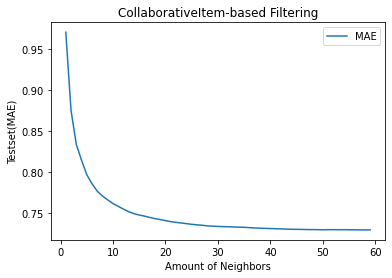

In [73]:
plt.plot(k1,ibc_nn_mae)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Testset(MAE)')
plt.legend(['MAE'])
plt.title('CollaborativeItem-based Filtering')
plt.show()

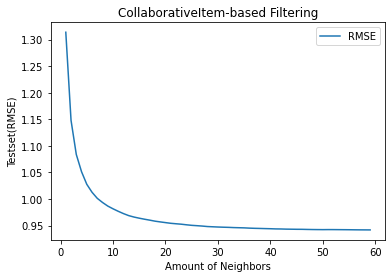

In [74]:
plt.plot(k1,ibc_nn_rmse)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Testset(RMSE)')
plt.legend(['RMSE'])
plt.title('CollaborativeItem-based Filtering')
plt.show()

In [48]:
k_ibc = ibc_nn_rmse.index(min(ibc_nn_rmse))+1
print('Best Value of K : ', k_ibc)
print('Minimum RMSE : ', min(ibc_nn_rmse))

Best Value of K :  59
Minimum RMSE :  0.941847186952282
